## Задание 4

Составить аналитический отчет о продажах фруктов. Данные для составления отчета приведены в файле «Данные для статобработки.xlsx» на вкладке «Продажи фруктов» в килограммах.
Отчет должен содержать:
- описание алгоритмов и методики исследований;
- найденные эффекты с пояснениями;
- результаты анализа отчета.


In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from termcolor import colored

In [415]:
fruits = pd.read_excel('Данные для статобработки.xlsx', sheet_name = 'Продажи фруктов')

Для начала, обобщим данные по продажам фруктов. Просчитаем такие показатели продаж для каждого вида фрукта (все показатели в килограммах), как:
- общие продажи;
- среднее значение продаж за весь период;
- стандартное оклонение от среднего;
- максимальные и минимальные продажи.


In [416]:
column_names = list(fruits.columns)
column_names.remove('Неделя продаж')

totals = pd.DataFrame(columns = column_names, index = \
                      ['Всего продано, кг', "Среднее", "Стандартное отклонение", "Минимально", "Максимально"])
for i in column_names:
    sum_fruits = fruits[i].sum()
    mean_fruits = fruits[i].mean()
    std_fruits = fruits[i].std()
    min_fruits = fruits[i].min()
    max_fruits = fruits[i].max()
    totals[i] = [sum_fruits, mean_fruits, std_fruits, max_fruits, min_fruits]

totals = totals.round(2)
totals

,Яблоко,Вишня,Манго,Крыжовник,Киви,Хурма,Апельсин,Груши,Сливы,Абрикосы,Персики,Грейфрут,Мандарин,Нектарин,Финики,Брусника,Черника,Клюква
"Всего продано, кг",1100255.00,39603.00,7364.00,51923.00,1066.00,6150.00,20953.00,758072.00,2153896.00,1063473.00,91809.00,109686.00,25109.00,141799.00,55692.0,85062.00,8454.00,4530.00
Среднее,21573.63,776.53,144.39,1018.10,20.90,120.59,410.84,14864.16,42233.25,20852.41,1800.18,2150.71,492.33,2780.37,1092.0,1667.88,165.76,88.82
Стандартное отклонение,7585.92,769.30,89.25,771.41,8.21,105.44,168.58,11487.70,26622.43,10034.85,842.36,1010.78,226.24,2048.42,459.2,1153.08,233.61,120.81
Минимально,50753.00,5166.00,525.00,2672.00,57.00,600.00,877.00,63147.00,132165.00,51277.00,5068.00,5693.00,1640.00,13650.00,2544.0,5606.00,1319.00,655.00
Максимально,1968.00,273.00,57.00,312.00,6.00,0.00,17.00,4890.00,17777.00,8631.00,830.00,931.00,204.00,828.00,16.0,0.00,0.00,0.00


In [417]:
transcpose_totals = totals.transpose()
transcpose_totals = transcpose_totals.sort_values(by = 'Всего продано, кг', ascending = False).reset_index()
transcpose_totals.rename(columns = {'index': 'Фрукт'}, inplace = True)

print('Всего за рассматриваемый период было продано {} килограмм всех видов фруктов.'.\
      format(round(transcpose_totals['Всего продано, кг'].sum())))
print(colored('\n3 cамых часто продаваемых фрукта (по убыванию продаж):', 'red', attrs=['bold']))
for i in range(1, 4):
    print(colored('{} {}'.format(i, transcpose_totals['Фрукт'].iloc[i-1]), attrs=['bold']))
    print('За весь рассматриваемый период было продано {} килограмм.'.\
          format(round(transcpose_totals['Всего продано, кг'][i-1])))
    print('{name} составляют около {percent}% от общих продаж фруктов в килограммах.\n'.\
          format(name = transcpose_totals['Фрукт'][i-1], percent = \
                 round(transcpose_totals['Всего продано, кг'][i-1]/transcpose_totals['Всего продано, кг'].\
                       sum(), 3)))
print(colored('\n3 cамых мало продаваемых фрукта (по возрастанию продаж):', 'red', attrs=['bold']))
for i in range(1, 4):
    index = i-2*i
    print(colored('{} {}'.format(i, transcpose_totals['Фрукт'].iloc[index]), attrs=['bold']))
    print('За весь рассматриваемый период было продано {} килограмм.'.\
          format(round(transcpose_totals['Всего продано, кг'].iloc[index])))
    print('{name} составляют около {percent}% от общих продаж фруктов в килограммах.\n'.\
          format(name = transcpose_totals['Фрукт'].iloc[index], percent = \
                 round(transcpose_totals['Всего продано, кг'].iloc[index]/transcpose_totals['Всего продано, кг'].\
                       sum(), 4)))


Всего за рассматриваемый период было продано 5724896 килограмм всех видов фруктов.

3 cамых часто продаваемых фрукта (по убыванию продаж):
1 Сливы
За весь рассматриваемый период было продано 2153896 килограмм.
Сливы составляют около 0.376% от общих продаж фруктов в килограммах.

2 Яблоко
За весь рассматриваемый период было продано 1100255 килограмм.
Яблоко составляют около 0.192% от общих продаж фруктов в килограммах.

3 Абрикосы
За весь рассматриваемый период было продано 1063473 килограмм.
Абрикосы составляют около 0.186% от общих продаж фруктов в килограммах.


3 cамых мало продаваемых фрукта (по возрастанию продаж):
1 Киви
За весь рассматриваемый период было продано 1066 килограмм.
Киви составляют около 0.0002% от общих продаж фруктов в килограммах.

2 Клюква
За весь рассматриваемый период было продано 4530 килограмм.
Клюква составляют около 0.0008% от общих продаж фруктов в килограммах.

3 Хурма
За весь рассматриваемый период было продано 6150 килограмм.
Хурма составляют около 0.0

Рассмотрим продажи фруктов по неделям. Для этого добавим в исходную таблицу новый столбец с суммарным значением продаж для каждой недели и построим на его основе график.

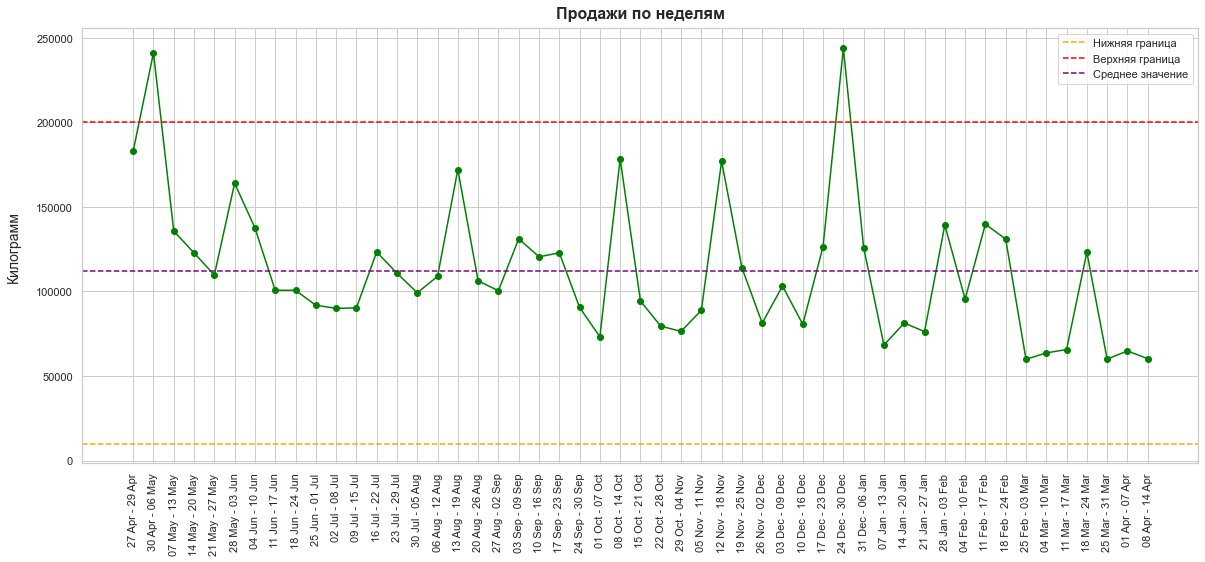

In [418]:
fruits['Сумма по неделям, кг'] = fruits[column_names].sum(axis = 1)

quart_25 = np.quantile(fruits['Сумма по неделям, кг'], 0.25)
quart_75 = np.quantile(fruits['Сумма по неделям, кг'], 0.75)
iqr = quart_75 - quart_25
lower = quart_25 - 1.5*iqr
upper = quart_75 + 1.5*iqr
fruits_mean = fruits['Сумма по неделям, кг'].mean()

fig, ax = plt.subplots(figsize = (20, 8))
sns.set_theme(style="whitegrid", palette="dark")
plt.plot(fruits['Неделя продаж'], fruits['Сумма по неделям, кг'], marker = 'o', color = 'green')
plt.title('Продажи по неделям', fontsize = 16, fontweight = 'bold', pad = 10)
plt.ylabel('Килограмм', labelpad = 15, fontsize = 14)
ax.set_xticks(range(0, len(fruits['Неделя продаж'])))
ax.set_xticklabels(fruits['Неделя продаж'], rotation = 90)
plt.axhline(lower, linestyle = '--', color = 'orange', label = 'Нижняя граница')
plt.axhline(upper, linestyle = '--', color = 'red', label = 'Верхняя граница')
plt.axhline(fruits_mean, linestyle = '--', color = 'purple', label = 'Среднее значение')
plt.legend()
plt.show()

На графике, помимо непосредственно продаж фруктов по неделям, для более полной картины добавлены дополнительные горизонтальные линии:
- границы, за пределами которых находятся выбросы продаж;
- среднее значение продаж за весь промежуток.

Из графика можно сделать выводы:  
1 Объём продаж по неделям нельзя назвать стабильным. Отсутствует чёткая тенденция к увеличению или уменьшению общих продаж фруктов на всём промежутке времени, на графике имеются колебания и продажи имеют скачкообразную динамику. 

2 Из общего графика сложно сказать о наличии сезонности в продажах фруктов. Продажи фруктов падают и возрастают независимо от сезона. Однако, всё же можно сказать о некой зависимости продаж от сезона. Для этого сравним суммарные продажи со средними за весь период. В летний период продажи, в основном, или выше среднего, или незначительно ниже его. В остальные сезоны значения продаж в большей мере разброшены относительно среднего (подробнее после 3-го выводы).

3 Для того, чтобы обнаружить выбросы (точки, которые находятся на ненормальном расстоянии от других точек) в данных и проанализировать их, был выбран такой способ, как интерквартильный диапазон (IQR). Выбросом считается любая точка, которая находится выше 1,5 IQR ниже первичного квартиля (т.е. ниже Q1 - 1.5IQR) или выше третьего квартиля (выше Q3 + 1.5IQR).
В нашем случае, есть только 2 недели, которые являются выбросами:
- 24дек-30дек, продажи составили 243 868 кг;
- 30апр-6 мая, продажи составили 241 139 кг.
Оба выброса можно объяснить повышением спроса на фрукты в преддверии праздников: 
- 24дек-30дек люди готовились к Новому году;
- 30апр-6мая, возможно, спрос на фрукты увеличился из-за майских праздников.

Изучим подробнее продажи по сезонам. Для этого добавим в исходную таблицу столбец с месяцем продаж. Так как продажи представлены по неделям и некоторые недели включают в себя продажи сразу за 2 месяца (например, 28 May - 03 Jun), рассмотрим 2 варианта:
- такие недели будут отнесены к продажам начального месяца;
- такие недели будут отнесены к продажам заключительного месяца.

После этого в каждом варианте проведём группировку по сезону и агрегируем по стандратному отклонению, сумме и минимальным продажам.

In [419]:
fruits['Сезон1'] = fruits_month['Неделя продаж'].\
apply(lambda x: 'summer' if x[-3:] in ['Aug', 'Jul', 'Jun'] \
      else ('spring' if x[-3:] in ['Mar', 'Apr', 'May'] else ('autumn' if x[-3:] in ['Sep', 'Oct', 'Nov'] \
                                                              else 'winter')))
group1 = fruits.groupby('Сезон1')['Сумма по неделям, кг'].agg(['std', 'min', 'sum'])

fruits['Сезон2'] = fruits_month['Неделя продаж'].\
apply(lambda x: 'summer' if x[3:6] in ['Aug', 'Jul', 'Jun'] \
      else ('spring' if x[3:6] in ['Mar', 'Apr', 'May'] else ('autumn' if x[3:6] in ['Sep', 'Oct', 'Nov'] \
                                                              else 'winter')))
group2 = fruits.groupby('Сезон2')['Сумма по неделям, кг'].agg(['std', 'min', 'sum'])

print(group1)
print('\n')
print(group2)


                 std    min      sum
Сезон1                              
autumn  34738.296901  73155  1447070
spring  58063.909307  59877  1289535
summer  27088.393765  90013  1495552
winter  46526.133637  68317  1492739


                 std    min      sum
Сезон2                              
autumn  35632.995203  73155  1427944
spring  58086.905624  60004  1393663
summer  22933.707617  90013  1431936
winter  48161.112115  59877  1471353


Из таблиц видно, что в обоих случаях значения летних продаж фруктов менее разброшены относительно среднего значения, нежели продажи в других сезонах. Логично предположить, что летом и спрос, и предложение фруктов повышаются. В этот сезон из-за повышения предложения их стоимость ниже (чем, например, зимой), поэтому, спрос увеличивается и становится более стабильным.

Ещё один факт из которого можно сделать о большем спросе и продажах в летний период - минимальное значение продаж. Летом оно составляет 90013 кг, в то время как, например, весной и зимой оно равно 59877 кг и 68317 кг соответственно (в первом варианте).

Суммарные продажи по сезонам практически равны между собой. Однако, если учитывать выбросы продаж зимой и весной, летние суммарные продажи будут максимальными.

Теперь рассмотрим суммарные продажи каждого вида фрукта. Для этого внесём изменения в исходную таблицу (для дальнейшей группировки) и сгруппируем данные по месяцам. В итоге получим таблицу с продажами фруктов в каждый из месяцев.

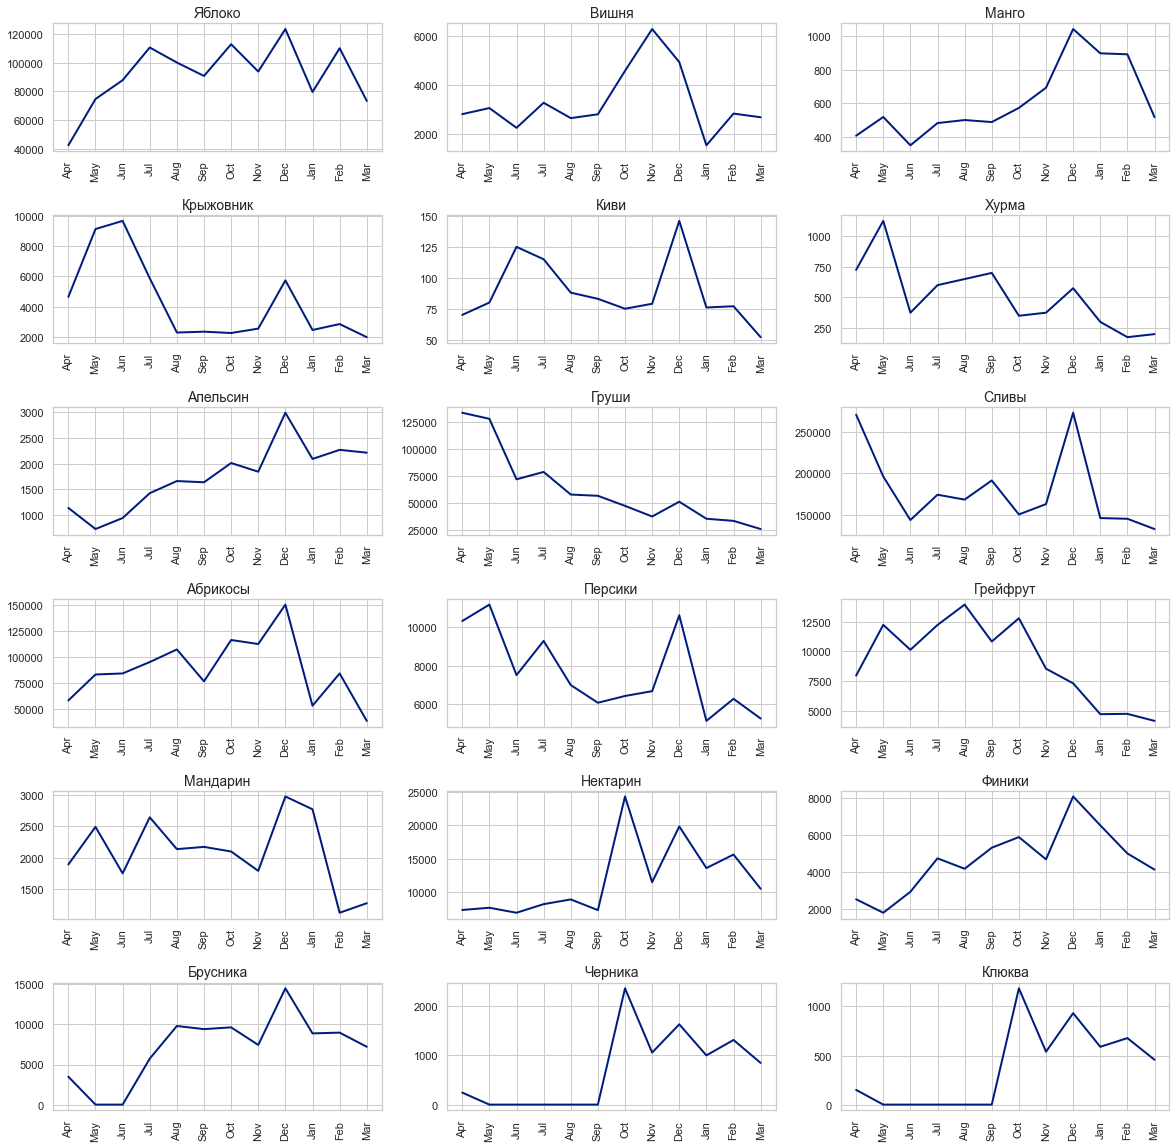

In [420]:
months = pd.DataFrame({'month':['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', \
                                'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']})
m_df = months.reset_index().set_index('month')
fruits['Месяц'] = fruits['Неделя продаж'].apply(lambda x: x[3:6])
fruits['Месяц индекс'] = fruits['Месяц'].map(m_df['index'])
fruits_by_month = fruits.groupby(['Месяц индекс', 'Месяц'])[column_names].sum().reset_index()

fig, ax = plt.subplots(6, 3, figsize = (20, 20))
fig.subplots_adjust(wspace = .2, hspace = .5)
ax = ax.ravel()
for i in column_names:
    index = column_names.index(i)
    ax[index].plot(fruits_by_month['Месяц индекс'], fruits_by_month[i], linewidth = 2)
    ax[index].set_title(i, fontsize = 14)
    ax[index].set_xticks(range(0, 12))
    ax[index].set_xticklabels(fruits_by_month['Месяц'], rotation = 90)
    

Как и было выявлено ранее, спрос на некоторые фрукты значительно увеличивается в преддверии праздников. У половины из фруктов декабрь является месяцем с максимальными продажами из-за покупок к Новому году. 

Продажи большинства фруктов не имеют явной тенденции к увеличению/уменьшению. Если не учитывать выброс в декабре, тенденция к уменьшению продаж наблюдается у груш, к увеличению - у апельсинов и манго(за исключением марта).

Можно посмотреть, как взаимосвязаны между собой продажи фруктов. Для этого построим матрицу корреляции и на её основе тепловую карту с коэффициентами корреляции между продажами фруктов.

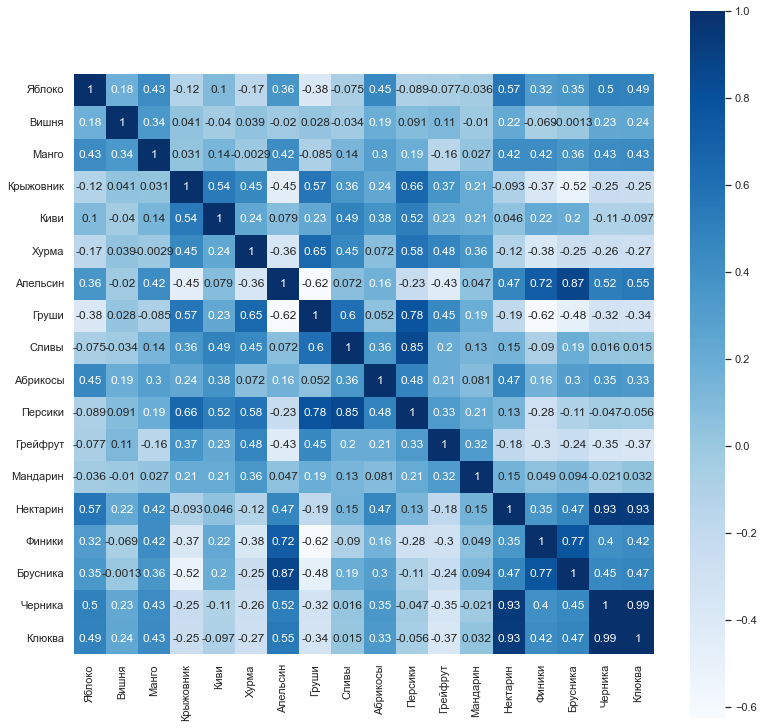

In [421]:
fruits_corr = fruits[column_names].corr()

fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(fruits_corr, square=True, cmap= 'Blues', annot = True)
plt.show()

Из тепловой карты видно, что продажи большинства фруктов слабо взаимосвязаны между собой. Однако, есть достаточно высокие коэффициенты корреляции между продажами:
- апельсинов и брусники (0.87);
- слив и персиков (0.85);
- нектаринов и черники (0.93);
- нектаринов и клюквы (0.93);
- черники и клюквы (0.93).

Коэффициенты корреляции между этими парами фруктов близки к 1, что говорит о наличии высокой положительной степени связи между продажами. В данном случае, если значения продаж одного вида фруктов будут возрастать, то и продажи второго вида фруктов также будет увеличиваться.

Также, между продажами фиников и груш наблюдается средняя отрицательная корреляция. Иными словами, поведение продаж одного вида фруктов будет противоположным поведению продаж другого вида. В нашем случае, если значение продаж фиников будет возрастать, то продажи груш будет уменьшаться, и наоборот.

**Вывод:** по результатам анализа можно сказать, что в продажах фруктов за рассмотренный период отсутствует чёткая тенденция к их увеличению или уменьшению, на всём промежутке имеются колебания и скачкообразная динамика.  
В продажах присутствует некая сезонность. В летний сезон спрос (как следствие, и продажи) на фрукты выше, чем в другие сезоны. Также, летние продажи более стабильны и менее разброшены относительно среднего значения, нежели продажи фруктов в других сезонах.  
В продажах были замечены выбросы (аномалии), связанные с резким и значительным увеличением спроса на фрукты в преддверии праздников: 
- 24дек-30дек люди готовились к Новому году;
- 30апр-6мая, возможно, спрос на фрукты увеличился из-за майских праздников.  

Между некоторыми фруктами была найдена сильная взаимосвязь. Например, между продажами нектаринов и клюквы коэффициент корреляции достиг 0,93, что говорит об очень сильной положительной степени связи между продажами этих фруктов.